In [1]:
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm, inv
import numpy as np

In [6]:
def bwgd_adaptive(y, A, niter, threshold):
    d, n = A.shape  
    x = np.zeros((niter, d))  
    x[0] = np.random.randn(d)  

    # Descent
    for iter in range(1, niter):
        # Discard samples
        indices = np.abs(A.T @ x[iter - 1]) >= threshold        
        A_filtered = A.T[indices].T.copy()
        y_filtered = y[indices].copy()

        # Covariance matrix transform
        C = A_filtered @ A_filtered.T / n
        C_sqrt = sqrtm(C)
        C_inv = np.real(inv(C_sqrt))
        A_tilde = C_inv @ A_filtered 
        x_tilde = C_sqrt @ x[iter - 1]

        # Descent
        b = A_tilde @ (np.sqrt(y_filtered) * (A_tilde.T @ x_tilde) / np.abs(A_tilde.T @ x_tilde))

        eta = 1/(np.linalg.norm(b - x_tilde)**2 - np.linalg.norm(b - x_tilde) / 2)
        
        x_tilde = (1 - eta) * x_tilde + (eta / n) * b

        x[iter] = C_inv @ x_tilde
        
    return x

In [17]:
sum_gradient = A @ (np.sqrt(y) * (A.T @ x) / np.abs(A.T @ x))
(np.linalg.norm(x - sum_gradient)**2 - np.linalg.norm(x - sum_gradient) / 2)

51981324.462223135

In [22]:
- np.linalg.norm(x - sum_gradient) / 2

-3605.0287617085955

In [4]:
# Take minimum error for positive and negative x
def min_error(x_hat, x_star):
    errors = []
    for x in x_hat:
            error_positive = np.linalg.norm(x_star - x)
            error_negative = np.linalg.norm(-1*x_star - x)
            errors.append(min(error_positive, error_negative))
    return errors

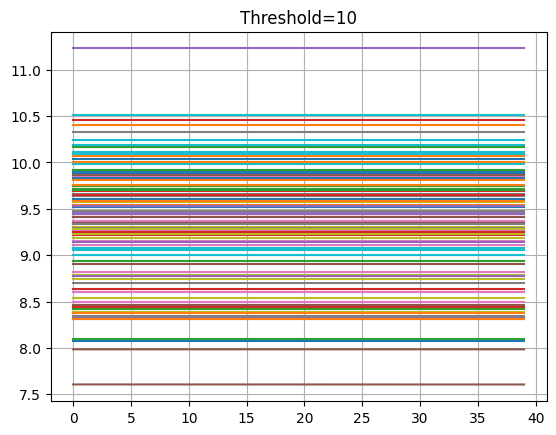

In [7]:
n = 1000
d = 50
errors = []
thresholds =  np.array([8, 6, 4, 2, 1e+00, 1e-01, 1e-02, 1e-03, 0])
thresholds =  np.array([10])


for threshold in thresholds:
    threshold_error = []
    for j in range(1, 101):  
        # Generate vectors
        x = np.ones(d)
        A = np.random.randn(d, n)
        y = np.square(A.T @ x)
        
        # Run the algorithm
        x_hat = bwgd_adaptive(y, A, 40, threshold)

        error = min_error(x_hat, x)
        threshold_error.append(error)
        
        # Plot results
        plt.plot(error)

    errors.append(threshold_error)

    plt.title(f'Threshold={threshold}')
    plt.grid(True)
    plt.show()